<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных-и-расчеты" data-toc-modified-id="Подготовка-данных-и-расчеты-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных и расчеты</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание данных: 

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [ ]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [ ]:
calls.duplicated().sum()

0

In [ ]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице можем заметить столбец Unnamed, в котором нет необходимости, так как он повторяет уже имеющуюся индексацию.

In [ ]:
internet = internet.drop('Unnamed: 0', 1)

In [ ]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [ ]:
internet.isnull().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [ ]:
internet.duplicated().sum()

0

In [ ]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [ ]:
messages.duplicated().sum()

0

In [ ]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [ ]:
users.duplicated().sum()

0

В первом шаге были прочитаны файлы с данными о звонках, интернет-трафике, сообщениях, тарифах и пользователях, сохранены в таблицы с соответствующими названиями и по ним была получена общая информация с помощью функции *info*. Также были проверены данные на пропущенные и повторяющиеся значения, которые найдены не были помимо пропущенных значений в столбце с датой прекращения пользования тарифом, что объясняется тем, что на момент выгрузки данных тариф еще действовал.

Перейдем к предобработке данных.

## Подготовка данных и расчеты

В данном шаге необходимо привести данные к нужному типу, найти и исправить ошибки, а также посчитать некоторые параметры для каждого пользователя.

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

В столбцах с датами заменили данные на тип *datetime*.

In [ ]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

Так как значения минут и мегабайтов в тарифах всегда округляются вверх, воспользовались функцией *ceil* и также изменили тип данных на целочисленный. 

Рассмотрим ошибки в данных. В датасете звонков уже в первых двух строчках можем видеть, что длительность разговора составляла 0 минут. Данные звонки можно рассматривать как пропущенные, поэтому они не повлияют на дальнейший анализ и их можно отбросить из выборки. Проведем то же самое с истраченными мегабайтами,  равными 0. Сделаем проверку после данной обработки.

In [ ]:
calls = calls.query('duration != 0')
internet = internet.query('mb_used != 0')

In [ ]:
calls.info()
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null int64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


Видим, что количество звонков и строк в таблице по истраченному интернету значительно уменьшилось. Несмотря на это, их отсутствие не повлияет на дальнейший расчет и анализ.

Перейдем к необходимым расчетам. Нужно найти для каждого пользователя: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Для начала добавим новые столбцы в таблицы с месяцами. Затем создадим сводные таблицы для расчетов необходимых параметров.

In [ ]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [ ]:
calls_count = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum'])
calls_count.columns = ['calls','total_duration']
calls_count.head(10)

calls  total_duration
user_id month                       
1000    5         17             159
        6         28             172
        7         41             340
        8         42             408
        9         46             466
        10        44             350
        11        37             338
        12        38             333
1001    11        45             430
        12        47             414

In [ ]:
messages_count = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_count.columns = ['messages']
messages_count.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

In [ ]:
internet_count = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_count.columns = ['total_mb']
internet_count.head(10)

total_mb
user_id month          
1000    5          2256
        6         23257
        7         14016
        8         14070
        9         14581
        10        14717
        11        14768
        12         9827
1001    11        18452
        12        14053

In [ ]:
#объединяем таблицы в одну

data = calls_count.merge(messages_count, on=['user_id', 'month'], how='outer')
data = data.merge(internet_count, on=['user_id', 'month'], how='outer')

In [ ]:
data

calls  total_duration  messages  total_mb
user_id month                                           
1000    5       17.0           159.0      22.0    2256.0
        6       28.0           172.0      60.0   23257.0
        7       41.0           340.0      75.0   14016.0
        8       42.0           408.0      81.0   14070.0
        9       46.0           466.0      57.0   14581.0
...              ...             ...       ...       ...
1489    10       NaN             NaN      21.0   19588.0
        11       NaN             NaN      20.0   17516.0
        12       NaN             NaN      35.0   17341.0
1240    2        NaN             NaN       NaN     961.0
1476    4        NaN             NaN       NaN     531.0

[3214 rows x 4 columns]

In [ ]:
#заменим отсутствующие значения на 0 для более удобного дальнейшего расчета и изменим тип данных на целочисленный

data['calls'] = data['calls'].fillna(value=0).astype('int')
data['total_duration'] = data['total_duration'].fillna(value=0).astype('int')
data['messages'] = data['messages'].fillna(value=0).astype('int')
data['total_mb'] = data['total_mb'].fillna(value=0).astype('int')

#data.fillna(value=0).astype('int')

In [ ]:
data

calls  total_duration  messages  total_mb
user_id month                                           
1000    5         17             159        22      2256
        6         28             172        60     23257
        7         41             340        75     14016
        8         42             408        81     14070
        9         46             466        57     14581
...              ...             ...       ...       ...
1489    10         0               0        21     19588
        11         0               0        20     17516
        12         0               0        35     17341
1240    2          0               0         0       961
1476    4          0               0         0       531

[3214 rows x 4 columns]

In [ ]:
#добавляем в таблицу тарифы и город для каждой строки

data = data.reset_index()
data = data.merge(users[['user_id','tariff','city']], on='user_id', how='left')

Далее добавим в таблицу необходимые параметры по тарифу.

In [ ]:
tariffs.rename(columns={'tariff_name':'tariff'}, inplace=True)

In [ ]:
data = data.merge(tariffs, on='tariff', how='left')

In [ ]:
data.head()

,user_id,month,calls,total_duration,messages,total_mb,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17,159,22,2256,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,28,172,60,23257,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,41,340,75,14016,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,42,408,81,14070,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,46,466,57,14581,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [ ]:
#находим превышения по тарифу

data['minutes_overrun'] = data['total_duration'] - data['minutes_included'] 
data['messages_overrun'] = data['messages'] - data['messages_included']
data['mb_overrun'] = data['total_mb'] - data['mb_per_month_included']

In [ ]:
#создаем функцию для расчета выручки по превышениям тарифа

def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute']
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['mb_overrun'] > 0:
        revenue_mb = (row['mb_overrun'] / 1024) * row['rub_per_gb']
    return revenue_by_min + revenue_by_messages + revenue_mb

data['total_revenue'] = data['rub_monthly_fee'] + data.apply(get_revenue,1)

In [ ]:
data.head()

,user_id,month,calls,total_duration,messages,total_mb,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_overrun,messages_overrun,mb_overrun,total_revenue
0,1000,5,17,159,22,2256,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2841,-978,-28464,1950.0
1,1000,6,28,172,60,23257,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2828,-940,-7463,1950.0
2,1000,7,41,340,75,14016,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2660,-925,-16704,1950.0
3,1000,8,42,408,81,14070,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2592,-919,-16650,1950.0
4,1000,9,46,466,57,14581,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2534,-943,-16139,1950.0


In [ ]:
data['total_revenue'] = np.ceil(data['total_revenue']).astype('int')

In [ ]:
#убираем лишние столбцы из таблицы

data = data.drop(['messages_included','mb_per_month_included','minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute'], 1)



In [ ]:
data.head()

,user_id,month,calls,total_duration,messages,total_mb,tariff,city,minutes_overrun,messages_overrun,mb_overrun,total_revenue
0,1000,5,17,159,22,2256,ultra,Краснодар,-2841,-978,-28464,1950
1,1000,6,28,172,60,23257,ultra,Краснодар,-2828,-940,-7463,1950
2,1000,7,41,340,75,14016,ultra,Краснодар,-2660,-925,-16704,1950
3,1000,8,42,408,81,14070,ultra,Краснодар,-2592,-919,-16650,1950
4,1000,9,46,466,57,14581,ultra,Краснодар,-2534,-943,-16139,1950


В данном шаге были подготовлены данные для дальнейшего анализа: для каждого пользователя были посчитаны по месяцам составляющие тарифов и помесячная выручка.

## Анализ данных

Необходимо описать поведение клиентов оператора, исходя из выборки, а именно сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Нужно посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы и описать распределения.

Найдем среднее количество, дисперсию и стандартное отклонение для сообщений, минут разговора и потраченному интернет-трафику каждого тарифа.

In [ ]:
parameters = data.pivot_table(index='tariff', values=['total_duration','messages','total_mb'], aggfunc=[np.mean,np.var,np.std])

In [ ]:
parameters

mean                                       var                 \
         messages total_duration      total_mb     messages total_duration   
tariff                                                                       
smart   33.384029     417.934948  16229.188425   796.812958   36219.315784   
ultra   49.363452     526.623350  19486.901523  2285.266143  100873.633397   

                            std                               
            total_mb   messages total_duration      total_mb  
tariff                                                        
smart   3.454591e+07  28.227876     190.313730   5877.576978  
ultra   1.019356e+08  47.804457     317.606098  10096.317202

Сравним два тарифа, построив диаграммы размаха и гистограммы для каждого параметра.

Text(0.5, 1.0, 'Messages boxplot')

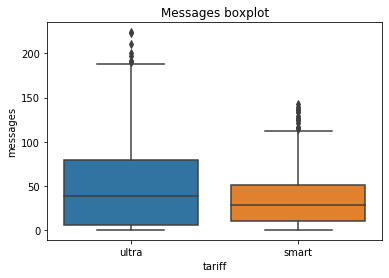

In [ ]:
sns.boxplot(x="tariff", y='messages', data=data).set_title('Messages boxplot')

Text(0.5, 1.0, 'Duration in mins boxplot')

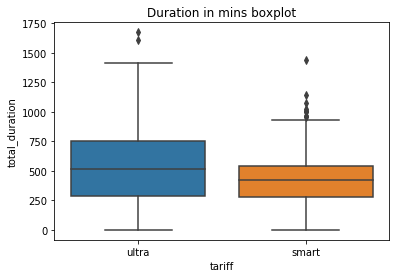

In [ ]:
sns.boxplot(x="tariff", y='total_duration', data=data).set_title('Duration in mins boxplot')

Text(0.5, 1.0, 'MB used boxplot')

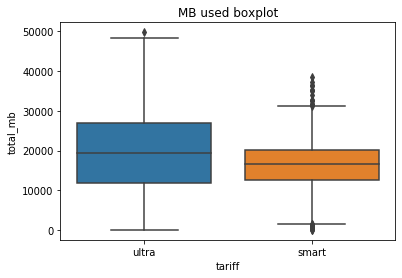

In [ ]:
sns.boxplot(x="tariff", y='total_mb', data=data).set_title('MB used boxplot')

Сделаем срезы данных по двум тарифам, чтобы построить гистограммы:

In [ ]:
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

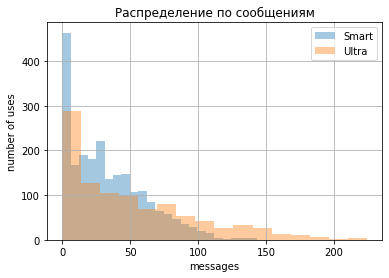

In [ ]:
sns.distplot(smart['messages'], hist=True, kde=False, label = 'Smart')
sns.distplot(ultra['messages'], hist=True, kde=False, label = 'Ultra')
plt.grid(True)
plt.ylabel("number of uses")
plt.title("Распределение по сообщениям")
plt.legend()

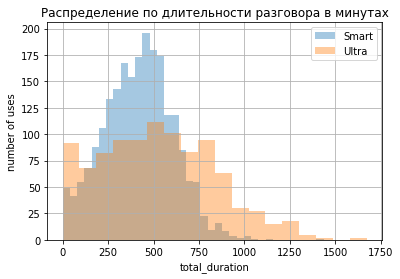

In [ ]:
sns.distplot(smart['total_duration'], hist=True, kde=False, label = 'Smart')
sns.distplot(ultra['total_duration'], hist=True, kde=False, label = 'Ultra')
plt.grid(True)
plt.ylabel("number of uses")
plt.title("Распределение по длительности разговора в минутах")
plt.legend()

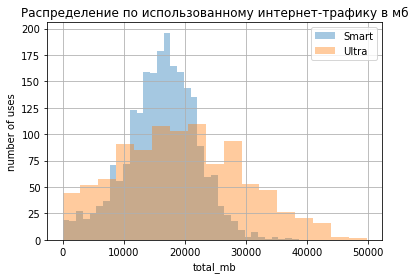

In [ ]:
sns.distplot(smart['total_mb'], hist=True, kde=False, label = 'Smart')
sns.distplot(ultra['total_mb'], hist=True, kde=False, label = 'Ultra')
plt.grid(True)
plt.ylabel("number of uses")
plt.title("Распределение по использованному интернет-трафику в мб")
plt.legend()

Из полученных диаграмм и гистограмм видим, что показатели тарифа Ultra распределены шире, то есть дисперсия больше, что мы также видим из таблицы. Также медианы по тарифу Ultra имеют большие значения: в среднем пользователи данного тарифа отправляют около 40 сообщений, в то время как пользователи Smart тарифа - 25; разговаривают около 525 минут (Ultra), по Smart - примерно 380 минут; тратят 20 гб, а по Smart - 16 гб.

Тариф Smart имеет 15 гб интернет тарифа, значит большое количество пользователей превышает тариф в данном показателе.

При том, что в тариф Ultra включено значительно большее количество единиц по каждому показателю (сообщения, минуты разговора, интернет-трафик), видим, что большая часть пользователей тратят сообщения, минуты и мегабайты в диапазоне тарифа Smart.

Построим графики, чтобы показать как меняется использование тарифов по каждому показателю в течение года. 

Text(0.5, 1.0, 'Распределение сообщений по месяцам')

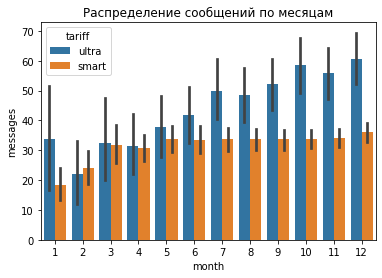

In [ ]:
sns.barplot(x='month',y='messages', hue='tariff', data=data)
plt.title("Распределение сообщений по месяцам")

Text(0.5, 1.0, 'Распределение затраченных минут по месяцам')

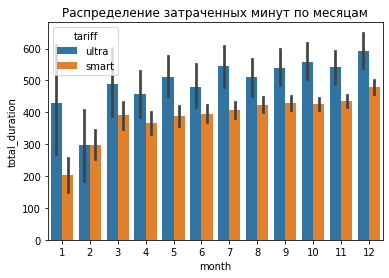

In [ ]:
sns.barplot(x='month',y='total_duration', hue='tariff', data=data)
plt.title("Распределение затраченных минут по месяцам")

Text(0.5, 1.0, 'Распределение интернет-трафика по месяцам')

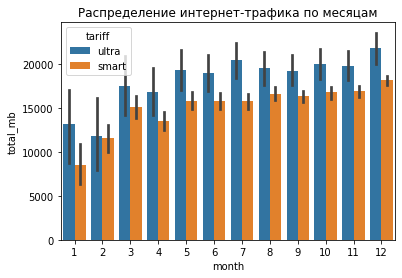

In [ ]:
sns.barplot(x='month',y='total_mb', hue='tariff', data=data)
plt.title("Распределение интернет-трафика по месяцам")

Из полученных графиков видим, что пользователи отправляют больше всего сообщений, тратят больше минут разговора и интернет-трафика по обоим тарифам в декабре. Также видим превышение по интернет-трафику среди пользователей тарифа Smart с мая до конца месяца. 

Проанализируем эти превышения.

In [ ]:
over_limits = data.query('tariff == "smart" and mb_overrun > 0')

In [ ]:
over_limits['mb_overrun'].median()/1024

3.9443359375

Среди пользователей, превышающих тариф Smart, среднее количество превышения составляет 3.95 гб сверх интернет-трафика. Проверим, есть ли пользователи, которые по тарифу Smart тратят не меньше чем плата по тарифу Ultra.

In [ ]:
data.query('tariff == "smart" and total_revenue > 1950').count()

user_id             385
month               385
calls               385
total_duration      385
messages            385
total_mb            385
tariff              385
city                385
minutes_overrun     385
messages_overrun    385
mb_overrun          385
total_revenue       385
city_category       385
dtype: int64

Видим, что такое встречается 385 раз, таким пользователям можно посоветовать приобретать тариф Ultra, чтобы сэкономить и тратить параметры внутри тарифа, не переплачивая.

Найдем средние значения параметров, которые тратят клиенты в месяц.

In [ ]:
median_parameters = data.pivot_table(index=['user_id','tariff'],values=['total_duration','messages','total_mb','total_revenue'], aggfunc='median').astype('int')
median_parameters                        

,,messages,total_duration,total_mb,total_revenue
user_id,tariff,,,,
1000,ultra,65,339,14325,1950
1001,smart,0,422,16252,852
1002,smart,11,214,17601,988
1003,ultra,83,824,11368,1950
1004,ultra,154,132,17828,1950
...,...,...,...,...,...
1495,ultra,82,954,29393,1950
1496,smart,41,524,24067,2397
1497,smart,17,490,14174,550


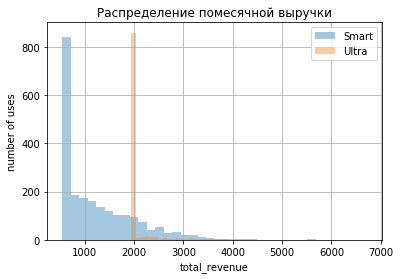

In [ ]:
sns.distplot(smart['total_revenue'], hist=True, kde=False, label = 'Smart')
sns.distplot(ultra['total_revenue'], hist=True, kde=False, label = 'Ultra')
plt.grid(True)
plt.ylabel("number of uses")
plt.title("Распределение помесячной выручки")
plt.legend()

In [ ]:
revenue = data.pivot_table(index='tariff',values='total_revenue',aggfunc=['sum'])
revenue

,sum
,total_revenue
tariff,
smart,2749786
ultra,2029690


In [ ]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Из таблицы видим, что тариф Smart за год принес 2.75 млн рублей, а тариф Ultra - 2.03 млн рублей при количестве пользователей 351 и 149 соответственно.

## Проверка гипотез

В данном шаге нужно проверить гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Начнём с формулировки нулевой гипотезы H₀ (она всегда должна содержать в себе равенство): средняя выручка пользователей тарифа «Ультра» равна средней выручке тарифа «Смарт».

Альтернативная гипотеза H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. 

В нашей выборке 500 единиц, поэтому возьмем уровень значимости alpha равным 1%.

In [ ]:
smart_rev = data.query('tariff == "smart"')['total_revenue']
ultra_rev = data.query('tariff == "ultra"')['total_revenue']

In [ ]:
alpha = 0.01

results = st.ttest_ind (smart_rev, ultra_rev, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.6205727991960766e-295
Отвергаем нулевую гипотезу


При проверке гипотезы видим, что нулевая гипотеза была опровергнута, то есть средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Посчитаем среднюю выручку, чтобы наглядно увидеть числа.

In [ ]:
median_revenue = data.pivot_table(index='tariff', values=['total_revenue'], aggfunc='median')
median_revenue

,total_revenue
tariff,
smart,960
ultra,1950


Из полученного результата видим, что по тарифу Ultra пользователи укладываются в тариф, и выручка составляет только ежемесячную плату за тариф. В то время как по тарифу Smart пользователи выходят сверх тарифного плана, ежемесячная плата за который составляет 550 рублей.

Перейдем к проверке второй гипотезы.

Нулевая гипотеза H₀: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтернативная гипотеза H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [ ]:
moscow_rev = data.query('city == "Москва"')['total_revenue']
others_rev = data.query('city != "Москва"')['total_revenue']

In [ ]:
alpha = 0.01

results = st.ttest_ind (moscow_rev, others_rev, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4553974892423337
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу опровергнуть не получилось, значит средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. Посчитаем выручки, чтобы увидеть результат. Для этого города кроме Москвы соберем в одну группу.

In [ ]:
def city(city):
    if city['city'] == "Москва":
        return 'Москва'
    else: return 'Другие города'
    
data['city_category'] = data.apply(city,1)

In [ ]:
data

,user_id,month,calls,total_duration,messages,total_mb,tariff,city,minutes_overrun,messages_overrun,mb_overrun,total_revenue,city_category
0,1000,5,17,159,22,2256,ultra,Краснодар,-2841,-978,-28464,1950,Другие города
1,1000,6,28,172,60,23257,ultra,Краснодар,-2828,-940,-7463,1950,Другие города
2,1000,7,41,340,75,14016,ultra,Краснодар,-2660,-925,-16704,1950,Другие города
3,1000,8,42,408,81,14070,ultra,Краснодар,-2592,-919,-16650,1950,Другие города
4,1000,9,46,466,57,14581,ultra,Краснодар,-2534,-943,-16139,1950,Другие города
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,10,0,0,21,19588,smart,Санкт-Петербург,-500,-29,4228,1376,Другие города
3210,1489,11,0,0,20,17516,smart,Санкт-Петербург,-500,-30,2156,972,Другие города
3211,1489,12,0,0,35,17341,smart,Санкт-Петербург,-500,-15,1981,937,Другие города
3212,1240,2,0,0,0,961,ultra,Воронеж,-3000,-1000,-29759,1950,Другие города


In [ ]:
cities_revenue = data.pivot_table(index='city_category', values=['total_revenue'], aggfunc='median')
cities_revenue

,total_revenue
city_category,
Другие города,1519
Москва,1705


Из полученного результата видим, что выручка пользователей из Москвы и других городов отличается немного, она выше на 12%.

## Общий вывод

В ходе данного проекта были проанализированы данные 500 пользователей тарифов Smart и Ultra сети "Мегалайн". 

Из полученных результатов можно сделать вывод, что в среднем компания получает от пользователя тарифа Ultra 1950 рублей в месяц, а от пользователя тарифа Smart - 960 рублей. При этом, значительное количество пользователей тарифа Smart выходят сверх тарифного плана по интернет-трафику на 3.95 гб. Сумма превышения по тарифу составляет 410 рублей (960 р - 550р). Были найдены пользователи, которые по тарифу Smart платят больше чем за тариф Ultra, таким пользователям лучше перейти на тариф Ultra.

Пользователи тарифа Ultra стабильней пользуются тарифом, не выходя сверх включенных единиц. 

Несмотря на то, что выручка от тарифа Ultra меньше и составляет 2.03 млн рублей, а от тарифа Smart - 2.75 млн рублей, количество пользователей в 2.4 раза меньше, 351 против 149. Поэтому для дальнейшего продвижения и рекламы наиболее подходит тариф Ultra. 

Также при проверке гипотез было показано, что выручка пользователей из Москвы и других городов в среднем практически не различается.